# Draky Supermarket Sales Analysis

### problem questions
What is causing the decline in sales of the products
1. Sale trends over the years.
2. Products that made the highest sales
3. the products customers want are not properly displayed on the shelf where the customers can easily locate them.product visibility of the products are very low

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read the data

df = pd.read_csv("Chinwendu Ezenwaka - Supermarket - Chinwendu Ezenwaka - Supermarket.csv")

In [4]:
df

,Product Identifier,Supermarket Identifier,Product Supermarket Identifer,Product Weight,Product Fat Content,Product Shelf Visibility,Product Type,Product Price,Supermarket Opening Year,Supermarket Size,Supermarket Location Type,Supermarket Type,Average Price per ProductType,Product Supermarket Sales
0,NCA29,CHUKWUDI046,NCA29_CHUKWUDI046,10.500,Lo Fat,0.027276,Household,428.28,2004,Small,Cluster 1,Supermarket Type1,399.999418,8983.31
1,FDG53,CHUKWUDI049,FDG53_CHUKWUDI049,10.000,Low Fat,0.045928,Frozen Foods,345.30,2006,Medium,Cluster 1,Supermarket Type1,388.0710941,4893.63
2,NCN05,CHUKWUDI045,NCN05_CHUKWUDI045,8.235,Lo Fat,0.014489,Health and Hygiene,459.49,2009,NaN,Cluster 2,Supermarket Type1,367.1430293,7323.80
3,NCV17,CHUKWUDI046,NCV17_CHUKWUDI046,18.850,Low Fat,0.016108,Health and Hygiene,324.41,2004,Small,Cluster 1,Supermarket Type1,367.1430293,7541.85
4,FDK03,CHUKWUDI045,FDK03_CHUKWUDI045,12.600,Normal Fat,0.074070,Dairy,635.59,2009,NaN,Cluster 2,Supermarket Type1,409.5043429,11445.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,FDK21,CHUKWUDI045,FDK21_CHUKWUDI045,7.905,Low Fat,0.010033,Snack Foods,620.85,2009,NaN,Cluster 2,Supermarket Type1,395.35219,1877.56
2990,NCJ05,CHUKWUDI049,NCJ05_CHUKWUDI049,18.700,Low Fat,0.046160,Health and Hygiene,380.92,2006,Medium,Cluster 1,Supermarket Type1,367.1430293,4192.88
2991,FDI04,CHUKWUDI019,FDI04_CHUKWUDI019,NaN,Normal Fat,0.127660,Frozen Foods,496.36,1992,small,Cluster 1,Grocery Store,388.0710941,1977.43
2992,DRG37,CHUKWUDI013,DRG37_CHUKWUDI013,16.200,Low Fat,0.019362,Soft Drinks,386.74,1994,High,Cluster 3,Supermarket Type1,386.9982375,4284.42


# Exploring the Dataset 

This was done to find out the issues with the dataset that require cleaning. .shape is used to view the number of rows and columns the daaset contains.

In [5]:
# using .shape to view the structure of the dataset
df.shape

(2994, 14)

In [6]:
#using .columns to assess the column names
df.columns

Index(['Product Identifier', 'Supermarket Identifier',
       'Product Supermarket Identifer', 'Product Weight',
       'Product Fat Content', 'Product Shelf Visibility', 'Product Type',
       'Product Price', 'Supermarket Opening Year', 'Supermarket  Size',
       'Supermarket Location Type', 'Supermarket Type',
       'Average Price per ProductType', 'Product Supermarket Sales'],
      dtype='object')

# Issue 1:
The column names are not standardized. for example, the productType does not have underscore between them, other column naes are written with space between them instead of underscore.

In [6]:
#check the datatpes of each column
df.dtypes

Product Identifier                object
Supermarket Identifier            object
Product Supermarket Identifer     object
Product Weight                   float64
Product Fat Content               object
Product Shelf Visibility         float64
Product Type                      object
Product Price                    float64
Supermarket Opening Year          object
Supermarket  Size                 object
Supermarket Location Type         object
Supermarket Type                  object
Average Price per ProductType     object
Product Supermarket Sales        float64
dtype: object

### Issue 2:
The average price per product type is stored as an object datatype instead of float datatype, Supermarket opening year is stored as an object datatype instead of an integer. the both columns need to be converted to the right datatype

The .info function is used to find assess the overall information about the dataset.

In [7]:
#view the data info, to check the colum names, count, and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994 entries, 0 to 2993
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Product Identifier             2994 non-null   object 
 1   Supermarket Identifier         2994 non-null   object 
 2   Product Supermarket Identifer  2994 non-null   object 
 3   Product Weight                 2521 non-null   float64
 4   Product Fat Content            2994 non-null   object 
 5   Product Shelf Visibility       2994 non-null   float64
 6   Product Type                   2994 non-null   object 
 7   Product Price                  2994 non-null   float64
 8   Supermarket Opening Year       2994 non-null   object 
 9   Supermarket  Size              2107 non-null   object 
 10  Supermarket Location Type      2994 non-null   object 
 11  Supermarket Type               2994 non-null   object 
 12  Average Price per ProductType  2994 non-null   o

In [8]:
#check for the null values
df.isnull().sum()

Product Identifier                 0
Supermarket Identifier             0
Product Supermarket Identifer      0
Product Weight                   473
Product Fat Content                0
Product Shelf Visibility           0
Product Type                       0
Product Price                      0
Supermarket Opening Year           0
Supermarket  Size                887
Supermarket Location Type          0
Supermarket Type                   0
Average Price per ProductType      0
Product Supermarket Sales          0
dtype: int64

### Issue 3:
Here, I discovered that the product weight column has 473 null values while supermarket size column has 887 null values.

In [9]:
#checking for duplicates
df.duplicated().sum()

0

In [10]:
#check the first five rows of the dataset
df.head()

,Product Identifier,Supermarket Identifier,Product Supermarket Identifer,Product Weight,Product Fat Content,Product Shelf Visibility,Product Type,Product Price,Supermarket Opening Year,Supermarket Size,Supermarket Location Type,Supermarket Type,Average Price per ProductType,Product Supermarket Sales
0,NCA29,CHUKWUDI046,NCA29_CHUKWUDI046,10.500,Lo Fat,0.027276,Household,428.28,2004,Small,Cluster 1,Supermarket Type1,399.999418,8983.31
1,FDG53,CHUKWUDI049,FDG53_CHUKWUDI049,10.000,Low Fat,0.045928,Frozen Foods,345.30,2006,Medium,Cluster 1,Supermarket Type1,388.0710941,4893.63
2,NCN05,CHUKWUDI045,NCN05_CHUKWUDI045,8.235,Lo Fat,0.014489,Health and Hygiene,459.49,2009,NaN,Cluster 2,Supermarket Type1,367.1430293,7323.80
3,NCV17,CHUKWUDI046,NCV17_CHUKWUDI046,18.850,Low Fat,0.016108,Health and Hygiene,324.41,2004,Small,Cluster 1,Supermarket Type1,367.1430293,7541.85
4,FDK03,CHUKWUDI045,FDK03_CHUKWUDI045,12.600,Normal Fat,0.074070,Dairy,635.59,2009,NaN,Cluster 2,Supermarket Type1,409.5043429,11445.10


In [11]:
#check the last five rows of the dataset
df.tail()

,Product Identifier,Supermarket Identifier,Product Supermarket Identifer,Product Weight,Product Fat Content,Product Shelf Visibility,Product Type,Product Price,Supermarket Opening Year,Supermarket Size,Supermarket Location Type,Supermarket Type,Average Price per ProductType,Product Supermarket Sales
2989,FDK21,CHUKWUDI045,FDK21_CHUKWUDI045,7.905,Low Fat,0.010033,Snack Foods,620.85,2009,NaN,Cluster 2,Supermarket Type1,395.35219,1877.56
2990,NCJ05,CHUKWUDI049,NCJ05_CHUKWUDI049,18.700,Low Fat,0.046160,Health and Hygiene,380.92,2006,Medium,Cluster 1,Supermarket Type1,367.1430293,4192.88
2991,FDI04,CHUKWUDI019,FDI04_CHUKWUDI019,NaN,Normal Fat,0.127660,Frozen Foods,496.36,1992,small,Cluster 1,Grocery Store,388.0710941,1977.43
2992,DRG37,CHUKWUDI013,DRG37_CHUKWUDI013,16.200,Low Fat,0.019362,Soft Drinks,386.74,1994,High,Cluster 3,Supermarket Type1,386.9982375,4284.42
2993,FDE51,CHUKWUDI013,FDE51_CHUKWUDI013,5.925,Normal Fat,0.096387,Dairy,114.02,1994,High,Cluster 3,Supermarket Type1,409.5043429,892.17


In [13]:
#check for the unique values in  the columns
df.nunique()

Product Identifier               1273
Supermarket Identifier             10
Product Supermarket Identifer    2994
Product Weight                    376
Product Fat Content                10
Product Shelf Visibility         2779
Product Type                       21
Product Price                    2419
Supermarket Opening Year           12
Supermarket  Size                   6
Supermarket Location Type           3
Supermarket Type                    4
Average Price per ProductType      18
Product Supermarket Sales        1968
dtype: int64

In order to full assess the dataset in order to discovered hidden issues on each column, I used th 'value_counts() which makes more easier and faster to discover any inconsitency in a column.

In [14]:
df["Product Fat Content"].value_counts()

Low Fat          1816
Normal Fat       1045
Ultra Low fat     108
Norml Fat           6
Norml fat           6
Low Ft              5
Lo Fat              4
L Fat               2
L                   1
Lw Fat              1
Name: Product Fat Content, dtype: int64

In [15]:
df["Supermarket  Size"].value_counts()

Medium    914
Small     806
High      357
medium     16
medim       8
small       6
Name: Supermarket  Size, dtype: int64

In [16]:
df['Supermarket Opening Year'].value_counts()

1992    473
2014    368
2006    362
1994    357
2011    314
2004    304
2016    298
2009    280
2005    234
s009      2
s006      1
s004      1
Name: Supermarket Opening Year, dtype: int64

In [17]:
df["Product Type"].value_counts()

Fruits and Vegetables    454
Snack Foods              432
Household                349
Frozen Foods             282
Canned                   221
Dairy                    193
Health and Hygiene       186
Baking Goods             181
Meat                     168
Soft Drinks              151
Hard Drinks               87
Breads                    81
Others                    63
Breakfast                 36
Starchy Foods             25
Seafood                   25
Baking Good               22
Snack Food                18
Starchy Food              16
Fruits and Veg             3
Health and Hyg             1
Name: Product Type, dtype: int64

In [8]:
df['Average Price per ProductType'].value_counts()

398.2481124         457
395.35219           450
399.999418          349
388.0710941         281
391.717633          221
364.9189244         203
409.5043429         193
367.1430293         187
390.952803          168
386.9982375         151
376.598806           86
399.1672263          81
388.6077             63
421.2993827          41
395.3483333          36
401.9480488          25
b76.598805970149      1
b88.071094091904      1
Name: Average Price per ProductType, dtype: int64

In [18]:
df["Product Weight"].value_counts()

10.500    34
12.150    34
17.600    33
15.100    31
12.100    30
          ..
6.365      1
6.235      1
4.880      1
6.785      1
5.925      1
Name: Product Weight, Length: 376, dtype: int64

### Issue 4:
Inconsistency in the following columns; product fat content, supermarket opening year, and supermarket size. The Average price per producct type column contains a string 'b' which resulted to the column being stored in an object type format.

In [19]:
#Using .describe to get the data statistics
df.describe()

,Product Weight,Product Shelf Visibility,Product Price,Product Supermarket Sales
count,2521.000000,2994.000000,2994.000000,2994.000000
mean,12.833300,0.065242,393.135665,6168.377255
std,4.662013,0.051478,120.023567,4491.389399
min,4.555000,0.000000,78.730000,83.230000
25%,8.770000,0.026461,310.310000,2808.427500
50%,12.500000,0.051954,395.400000,5467.880000
75%,17.000000,0.093863,465.850000,8554.697500
max,21.350000,0.309390,661.980000,32717.410000


The summary statistics of the Supermarket opening year and average price per year columns are not available due to the fact that both were stored as object datatype.

# Data cleaning 

It is always advisable to make a copy of any dataset you are working before you start cleaning the dataset. this is so you can have a copy to fall back to when a mistake occur during data cleaning which is always inevitable.

In [9]:
#make a copy of the dataset
df_clean = df.copy()

In [10]:
df_clean

,Product Identifier,Supermarket Identifier,Product Supermarket Identifer,Product Weight,Product Fat Content,Product Shelf Visibility,Product Type,Product Price,Supermarket Opening Year,Supermarket Size,Supermarket Location Type,Supermarket Type,Average Price per ProductType,Product Supermarket Sales
0,NCA29,CHUKWUDI046,NCA29_CHUKWUDI046,10.500,Lo Fat,0.027276,Household,428.28,2004,Small,Cluster 1,Supermarket Type1,399.999418,8983.31
1,FDG53,CHUKWUDI049,FDG53_CHUKWUDI049,10.000,Low Fat,0.045928,Frozen Foods,345.30,2006,Medium,Cluster 1,Supermarket Type1,388.0710941,4893.63
2,NCN05,CHUKWUDI045,NCN05_CHUKWUDI045,8.235,Lo Fat,0.014489,Health and Hygiene,459.49,2009,NaN,Cluster 2,Supermarket Type1,367.1430293,7323.80
3,NCV17,CHUKWUDI046,NCV17_CHUKWUDI046,18.850,Low Fat,0.016108,Health and Hygiene,324.41,2004,Small,Cluster 1,Supermarket Type1,367.1430293,7541.85
4,FDK03,CHUKWUDI045,FDK03_CHUKWUDI045,12.600,Normal Fat,0.074070,Dairy,635.59,2009,NaN,Cluster 2,Supermarket Type1,409.5043429,11445.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,FDK21,CHUKWUDI045,FDK21_CHUKWUDI045,7.905,Low Fat,0.010033,Snack Foods,620.85,2009,NaN,Cluster 2,Supermarket Type1,395.35219,1877.56
2990,NCJ05,CHUKWUDI049,NCJ05_CHUKWUDI049,18.700,Low Fat,0.046160,Health and Hygiene,380.92,2006,Medium,Cluster 1,Supermarket Type1,367.1430293,4192.88
2991,FDI04,CHUKWUDI019,FDI04_CHUKWUDI019,NaN,Normal Fat,0.127660,Frozen Foods,496.36,1992,small,Cluster 1,Grocery Store,388.0710941,1977.43
2992,DRG37,CHUKWUDI013,DRG37_CHUKWUDI013,16.200,Low Fat,0.019362,Soft Drinks,386.74,1994,High,Cluster 3,Supermarket Type1,386.9982375,4284.42


In [11]:
# fill in the spaces with an underscore
df_clean.columns = df.columns.str.replace(' ', '_')

In [12]:
df_clean.columns

Index(['Product_Identifier', 'Supermarket_Identifier',
       'Product_Supermarket_Identifer', 'Product_Weight',
       'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type',
       'Product_Price', 'Supermarket_Opening_Year', 'Supermarket__Size',
       'Supermarket_Location_Type', 'Supermarket_Type',
       'Average_Price_per_ProductType', 'Product_Supermarket_Sales'],
      dtype='object')

There are columns that are irrelevant to our analysis: Product identifier and supermarket identifier columns. these two columns were combined in a single column. so therefore, I have no need of those columns since they are also availble in a single column. product identifier and supermarket identifier are dropped using .drop().

In [13]:
to_drop = ['Product_Identifier', 'Supermarket_Identifier']
df_clean = df_clean.drop(to_drop, axis=1)

In [14]:
# check for change
df_clean

,Product_Supermarket_Identifer,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket__Size,Supermarket_Location_Type,Supermarket_Type,Average_Price_per_ProductType,Product_Supermarket_Sales
0,NCA29_CHUKWUDI046,10.500,Lo Fat,0.027276,Household,428.28,2004,Small,Cluster 1,Supermarket Type1,399.999418,8983.31
1,FDG53_CHUKWUDI049,10.000,Low Fat,0.045928,Frozen Foods,345.30,2006,Medium,Cluster 1,Supermarket Type1,388.0710941,4893.63
2,NCN05_CHUKWUDI045,8.235,Lo Fat,0.014489,Health and Hygiene,459.49,2009,NaN,Cluster 2,Supermarket Type1,367.1430293,7323.80
3,NCV17_CHUKWUDI046,18.850,Low Fat,0.016108,Health and Hygiene,324.41,2004,Small,Cluster 1,Supermarket Type1,367.1430293,7541.85
4,FDK03_CHUKWUDI045,12.600,Normal Fat,0.074070,Dairy,635.59,2009,NaN,Cluster 2,Supermarket Type1,409.5043429,11445.10
...,...,...,...,...,...,...,...,...,...,...,...,...
2989,FDK21_CHUKWUDI045,7.905,Low Fat,0.010033,Snack Foods,620.85,2009,NaN,Cluster 2,Supermarket Type1,395.35219,1877.56
2990,NCJ05_CHUKWUDI049,18.700,Low Fat,0.046160,Health and Hygiene,380.92,2006,Medium,Cluster 1,Supermarket Type1,367.1430293,4192.88
2991,FDI04_CHUKWUDI019,NaN,Normal Fat,0.127660,Frozen Foods,496.36,1992,small,Cluster 1,Grocery Store,388.0710941,1977.43
2992,DRG37_CHUKWUDI013,16.200,Low Fat,0.019362,Soft Drinks,386.74,1994,High,Cluster 3,Supermarket Type1,386.9982375,4284.42


In [15]:
#correcting the inconsistency in the product_fat_content column
Product_Fat_Content_replace = {
    'Low Ft.*|Lw Fat.*|Lo Fat.*|L Fat.*|L.*':'Low Fat',
    'Norml.*|Normal.*':'Normal Fat'
}

In [16]:
# replacing the product_fat_content correction
df_clean["Product_Fat_Content"] = df_clean["Product_Fat_Content"].replace(Product_Fat_Content_replace, regex=True)

In [17]:
#check for change
df_clean["Product_Fat_Content"].value_counts()

Low Fat          1829
Normal Fat       1057
Ultra Low Fat     108
Name: Product_Fat_Content, dtype: int64

In [18]:
#correcting the inconsistency in the product_type column
Product_Type_replace = {
    'Fruits and Veg.*':'Fruits and Vegetables',
    'Health and Hyg.*':'Health and Hygiene',
    'Snack Food.*':'Snack Foods',
    'Baking Good.*':'Baking Goods',
    'Starchy Food.*':'Starchy Foods'
}

In [19]:
#replacing the corrected values
df_clean["Product_Type"] = df_clean["Product_Type"].replace(Product_Type_replace, regex=True)

In [20]:
#check for change
df_clean["Product_Type"].value_counts()

Fruits and Vegetables    457
Snack Foods              450
Household                349
Frozen Foods             282
Canned                   221
Baking Goods             203
Dairy                    193
Health and Hygiene       187
Meat                     168
Soft Drinks              151
Hard Drinks               87
Breads                    81
Others                    63
Starchy Foods             41
Breakfast                 36
Seafood                   25
Name: Product_Type, dtype: int64

In [22]:
Supermarket_opening_Year_replace = {
    's009.*':2009,
    's006.*':2006,
    's004.*':2004
}

In [23]:
df_clean["Supermarket_Opening_Year"] = df_clean["Supermarket_Opening_Year"].replace(Supermarket_opening_Year_replace, regex=True)

In [24]:
#check for change
df_clean["Supermarket_Opening_Year"].value_counts()

1992    473
2014    368
2006    362
1994    357
2011    314
2004    304
2016    298
2009    280
2005    234
2009      2
2006      1
2004      1
Name: Supermarket_Opening_Year, dtype: int64

In [25]:
# convert the Supermarket opening year column to int64
df_clean['Supermarket_Opening_Year'] = df_clean['Supermarket_Opening_Year'].astype('int64')

In [26]:
# check if the code worked
df_clean.Supermarket_Opening_Year.dtype

dtype('int64')

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994 entries, 0 to 2993
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Product_Supermarket_Identifer  2994 non-null   object 
 1   Product_Weight                 2521 non-null   float64
 2   Product_Fat_Content            2994 non-null   object 
 3   Product_Shelf_Visibility       2994 non-null   float64
 4   Product_Type                   2994 non-null   object 
 5   Product_Price                  2994 non-null   float64
 6   Supermarket_Opening_Year       2994 non-null   int64  
 7   Supermarket__Size              2107 non-null   object 
 8   Supermarket_Location_Type      2994 non-null   object 
 9   Supermarket_Type               2994 non-null   object 
 10  Average_Price_per_ProductType  2994 non-null   object 
 11  Product_Supermarket_Sales      2994 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage:

In [28]:
#cleaning the supermaket size column using dictionaries
Supermarket__Size_replace = {
    'medium.*|medim.*':'Medium',
    'small.*':'Small'
}

In [29]:
# replace the errors with supermarket  size replace dictionaries
df_clean["Supermarket__Size"] = df_clean["Supermarket__Size"].replace(Supermarket__Size_replace, regex=True)

In [31]:
# handling the null values in the supermarket size column by filling with 'No Size'
df_clean['Supermarket__Size'] = df_clean['Supermarket__Size'].fillna('No Size')

In [32]:
# check for change
df_clean["Supermarket__Size"].value_counts()

Medium     938
No Size    887
Small      812
High       357
Name: Supermarket__Size, dtype: int64

In [33]:
# strip string value b in Average  price per producttype
df_clean["Average_Price_per_ProductType"] = df_clean["Average_Price_per_ProductType"].str.strip('b')

In [34]:
#check for change
df_clean["Average_Price_per_ProductType"].value_counts()

398.2481124        457
395.35219          450
399.999418         349
388.0710941        281
391.717633         221
364.9189244        203
409.5043429        193
367.1430293        187
390.952803         168
386.9982375        151
376.598806          86
399.1672263         81
388.6077            63
421.2993827         41
395.3483333         36
401.9480488         25
76.598805970149      1
88.071094091904      1
Name: Average_Price_per_ProductType, dtype: int64

In [35]:
# convert the average price per producttype column from objet datatype to float datatype
df_clean['Average_Price_per_ProductType'] = pd.to_numeric(df_clean['Average_Price_per_ProductType'])

In [36]:
# check for change
df_clean['Average_Price_per_ProductType'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2994 entries, 0 to 2993
Series name: Average_Price_per_ProductType
Non-Null Count  Dtype  
--------------  -----  
2994 non-null   float64
dtypes: float64(1)
memory usage: 23.5 KB


In [37]:
# check for unique values
df_clean.isnull().sum()

Product_Supermarket_Identifer      0
Product_Weight                   473
Product_Fat_Content                0
Product_Shelf_Visibility           0
Product_Type                       0
Product_Price                      0
Supermarket_Opening_Year           0
Supermarket__Size                  0
Supermarket_Location_Type          0
Supermarket_Type                   0
Average_Price_per_ProductType      0
Product_Supermarket_Sales          0
dtype: int64

In [48]:
# check for the unique values
df_clean.nunique()

Product_Supermarket_Identifer    2994
Product_Weight                    376
Product_Fat_Content                 3
Product_Shelf_Visibility         2779
Product_Type                       16
Product_Price                    2419
Supermarket_Opening_Year            9
Supermarket__Size                   4
Supermarket_Location_Type           3
Supermarket_Type                    4
Average_Price_per_ProductType      18
Product_Supermarket_Sales        1968
dtype: int64

In [49]:
# convert the float datatype column to 2 decimal places
pd.set_option("display.float_format", lambda x: '%.2f' % x)

In [50]:
df_clean.head()

,Product_Supermarket_Identifer,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket__Size,Supermarket_Location_Type,Supermarket_Type,Average_Price_per_ProductType,Product_Supermarket_Sales
0,NCA29_CHUKWUDI046,10.50,Low Fat,0.03,Household,428.28,2004,Small,Cluster 1,Supermarket Type1,400.00,8983.31
1,FDG53_CHUKWUDI049,10.00,Low Fat,0.05,Frozen Foods,345.30,2006,Medium,Cluster 1,Supermarket Type1,388.07,4893.63
2,NCN05_CHUKWUDI045,8.23,Low Fat,0.01,Health and Hygiene,459.49,2009,No Size,Cluster 2,Supermarket Type1,367.14,7323.80
3,NCV17_CHUKWUDI046,18.85,Low Fat,0.02,Health and Hygiene,324.41,2004,Small,Cluster 1,Supermarket Type1,367.14,7541.85
4,FDK03_CHUKWUDI045,12.60,Normal Fat,0.07,Dairy,635.59,2009,No Size,Cluster 2,Supermarket Type1,409.50,11445.10


In [51]:
# get a glimpse of the summary statistics of the numerical columns
df_clean.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Average_Price_per_ProductType,Product_Supermarket_Sales
count,2521.00,2994.00,2994.00,2994.00,2994.00,2994.00
mean,12.83,0.07,393.14,2004.86,391.43,6168.38
std,4.66,0.05,120.02,8.28,14.52,4491.39
min,4.55,0.00,78.73,1992.00,76.60,83.23
25%,8.77,0.03,310.31,1994.00,388.07,2808.43
50%,12.50,0.05,395.40,2006.00,395.35,5467.88
75%,17.00,0.09,465.85,2011.00,398.25,8554.70
max,21.35,0.31,661.98,2016.00,421.30,32717.41


### Exploratory data analysis

##### general overview of the sales by each supermarket type

In [70]:
# general overview of the sales by each Supermarket Type
df_clean[['Supermarket_Type', 'Product_Supermarket_Sales']].groupby('Supermarket_Type').agg(['mean','sum','count'])

Product_Supermarket_Sales                   
                                       mean          sum count
Supermarket_Type                                              
Grocery Store                    813.328852    347291.42   427
Supermarket Type1               6487.093293  12902828.56  1989
Supermarket Type2               5607.259933   1670963.46   298
Supermarket Type3              12667.993071   3547038.06   280

In [53]:
# getting the average unit price of the products type
df_clean[['Product_Type', 'Product_Price']]\
.groupby('Product_Type').mean()\
.sort_values(by='Product_Price', ascending=False)

,Product_Price
Product_Type,
Starchy Foods,417.27
Dairy,416.25
Meat,402.52
Fruits and Vegetables,402.08
Household,401.38
Soft Drinks,400.45
Breads,395.77
Snack Foods,394.69
Breakfast,390.55


Starchy foods lead the list. however, their prices are quite close to each other.

In [73]:
Sales_by_Year = df_clean.groupby('Supermarket_Opening_Year')['Product_Supermarket_Sales'].sum().reset_index()\

Sales_by_Year

,Supermarket_Opening_Year,Product_Supermarket_Sales
0,1992,3748449.30
1,1994,1465509.11
2,2004,1791945.83
3,2005,145880.18
4,2006,2279742.65
5,2009,2125456.88
6,2011,2506970.08
7,2014,2733204.01
8,2016,1670963.46


In [113]:
sales_by_product = df_clean.groupby('Product_Type')['Product_Supermarket_Sales'].sum().reset_index()\
.sort_values(by='Product_Supermarket_Sales', ascending=False)

In [84]:
sales_by_product

,Product_Type,Product_Supermarket_Sales
6,Fruits and Vegetables,2962548.83
13,Snack Foods,2826377.75
9,Household,2169226.58
5,Frozen Foods,1671214.69
3,Canned,1362807.78
4,Dairy,1174872.42
0,Baking Goods,1173785.56
8,Health and Hygiene,1075386.95
10,Meat,1073922.18
14,Soft Drinks,963026.49


In [172]:
shelf_visibility_by_product = df_clean.groupby('Product_Type')['Product_Shelf_Visibility'].sum().reset_index()\
.sort_values(by='Product_Shelf_Visibility', ascending=False)

shelf_visibility_by_product

,Product_Type,Product_Shelf_Visibility
6,Fruits and Vegetables,31.655720
13,Snack Foods,30.981494
9,Household,19.930861
5,Frozen Foods,19.114888
0,Baking Goods,13.767049
3,Canned,13.764511
4,Dairy,13.634007
10,Meat,11.258839
8,Health and Hygiene,9.872557
14,Soft Drinks,8.858381


In [139]:
sales_by_supermarket_size = df_clean.groupby('Supermarket__Size')['Product_Supermarket_Sales'].sum().reset_index()\
.sort_values(by='Product_Supermarket_Sales', ascending=False)
sales_by_supermarket_size 

,Supermarket__Size,Product_Supermarket_Sales
1,Medium,7481944.74
2,No Size,5020340.50
3,Small,4500327.15
0,High,1465509.11


In [165]:
df_clean.corr()

C:\Users\pc\AppData\Local\Temp\ipykernel_9924\1863484124.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.corr()


,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Average_Price_per_ProductType,Product_Supermarket_Sales
Product_Weight,1.000000,-0.034773,0.051694,0.011302,0.040908,0.047234
Product_Shelf_Visibility,-0.034773,1.000000,-0.057534,-0.083317,0.040392,-0.154743
Product_Price,0.051694,-0.057534,1.000000,0.153471,0.071476,0.525338
Supermarket_Opening_Year,0.011302,-0.083317,0.153471,1.000000,-0.007075,0.042440
Average_Price_per_ProductType,0.040908,0.040392,0.071476,-0.007075,1.000000,0.002825
Product_Supermarket_Sales,0.047234,-0.154743,0.525338,0.042440,0.002825,1.000000


### Data Visualization

In [127]:
# set the grid
sns.set_style("darkgrid")

Text(0, 0.5, 'Total Sales')

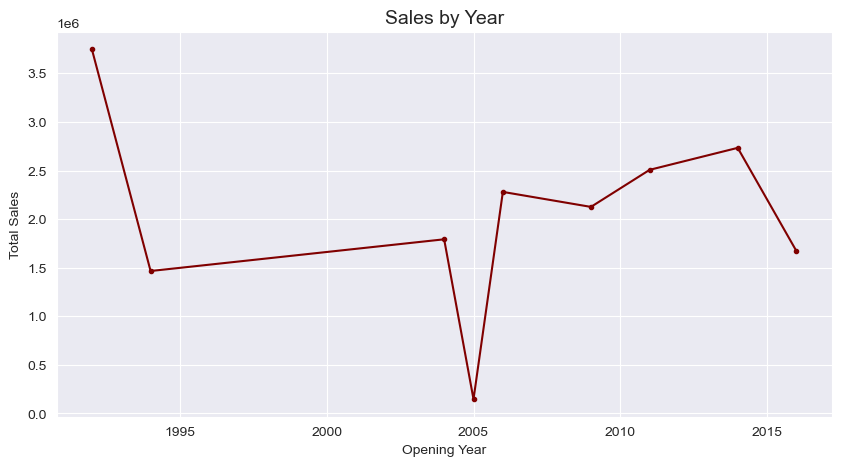

In [128]:
plt.figure(figsize=[10,5])
plt.plot(Sales_by_Year['Supermarket_Opening_Year'], Sales_by_Year['Product_Supermarket_Sales'],marker='.', color='maroon')
plt.title('Sales by Year', fontsize=14)
plt.xlabel('Opening Year')
plt.ylabel('Total Sales')

In 1992, the highest sales were recorded at an impressive total of 3,748,449.30. However, in 2005, there was a significant decrease in sales amounting to 145,880.18.

Text(0, 0.5, 'Total Sales')

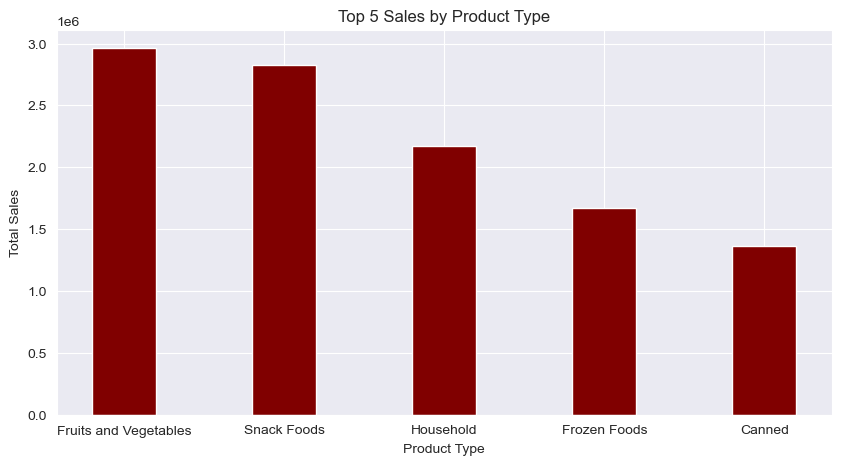

In [129]:
plt.figure(figsize=[10, 5])
x=sales_by_product['Product_Type'].head(5)
y=sales_by_product['Product_Supermarket_Sales'].head(5)
plt.bar(x,y, color='maroon', width=0.4)

plt.title('Top 5 Sales by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')

Text(0.5, 0, 'Supermarket Size')

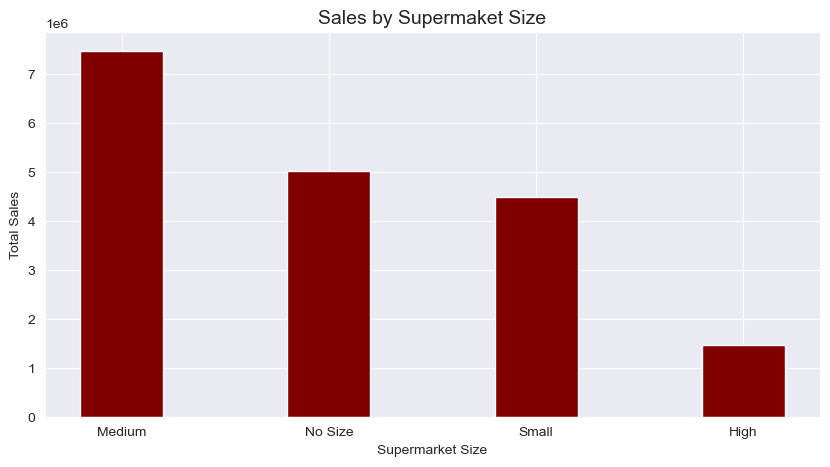

In [143]:
plt.figure(figsize=[10, 5])
x=sales_by_supermarket_size['Supermarket__Size']
y=sales_by_supermarket_size['Product_Supermarket_Sales']
plt.bar(x,y, color='maroon', width=0.4)

plt.title('Sales by Supermaket Size', fontsize=14)
plt.ylabel('Total Sales')
plt.xlabel('Supermarket Size')

Text(0.5, 0, 'Product Type')

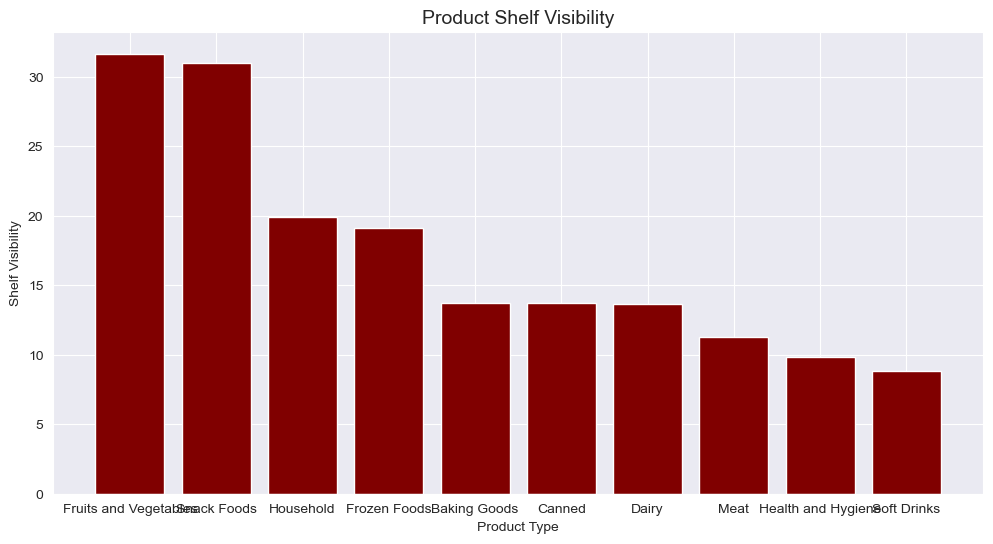

In [190]:
plt.figure(figsize=[12,6])
x=shelf_visibility_by_product['Product_Type'].head(10)
y=shelf_visibility_by_product['Product_Shelf_Visibility'].head(10)
plt.bar(x,y, color='maroon', width=0.8)

plt.title('Product Shelf Visibility', fontsize=14)
plt.ylabel('Shelf Visibility')
plt.xlabel('Product Type')

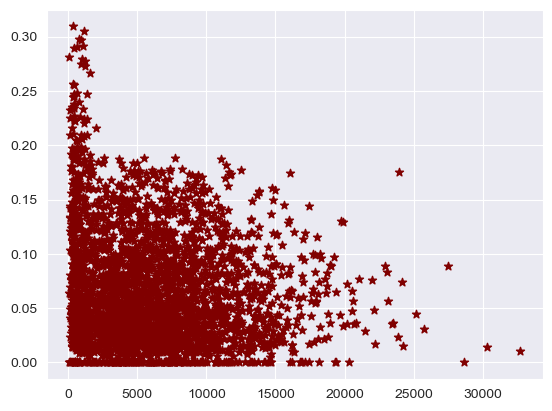

In [134]:
# relationship between the product shelf visibilty and supermarket sales
x= df_clean['Product_Supermarket_Sales']
y= df_clean['Product_Shelf_Visibility']

plt.scatter(x, y, color='maroon', marker = '*')

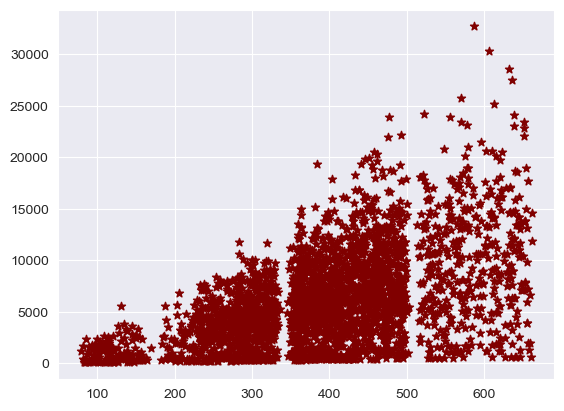

In [167]:
x= df_clean['Product_Price']
y= df_clean['Product_Supermarket_Sales']

plt.scatter(x, y, color='maroon', marker = '*')

In [146]:
df_clean.columns

Index(['Product_Supermarket_Identifer', 'Product_Weight',
       'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type',
       'Product_Price', 'Supermarket_Opening_Year', 'Supermarket__Size',
       'Supermarket_Location_Type', 'Supermarket_Type',
       'Average_Price_per_ProductType', 'Product_Supermarket_Sales'],
      dtype='object')

There is no relationship between the product shelf visibility and the product sales

Text(0.5, 1.0, 'Distribution of Product Weight')

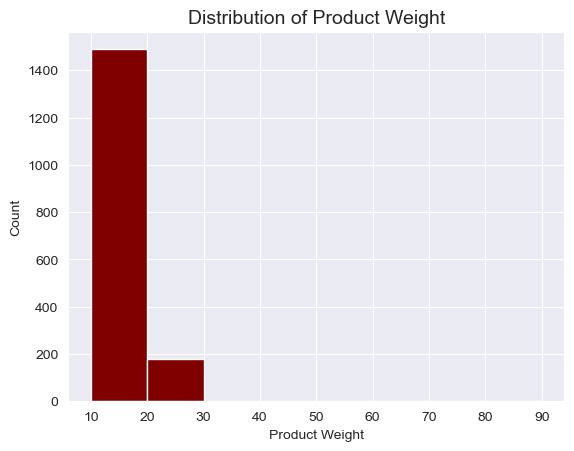

In [130]:
plt.hist(x=df_clean['Product_Weight'], bins=np.arange(10, 100, 10), color='maroon')

plt.xlabel('Product Weight')
plt.ylabel('Count')
plt.title('Distribution of Product Weight', fontsize=14)

Text(0.5, 1.0, 'Distribution of Product Shelf Visibility')

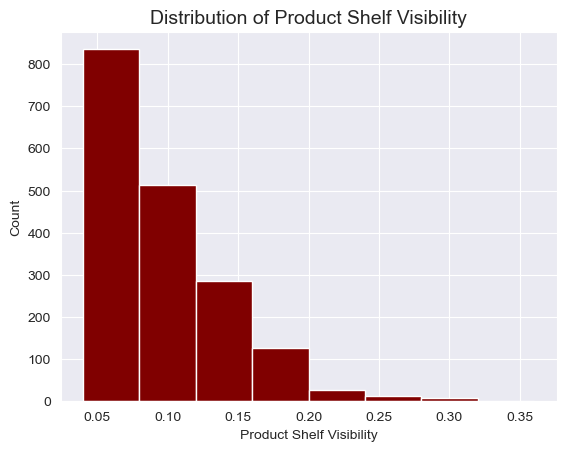

In [131]:
plt.hist(x=df_clean['Product_Shelf_Visibility'], bins=np.arange(0.04, 0.4, 0.04), color='maroon')

plt.xlabel('Product Shelf Visibility')
plt.ylabel('Count')
plt.title('Distribution of Product Shelf Visibility', fontsize=14)

Text(0.5, 1.0, 'Number of Product Fat Content')

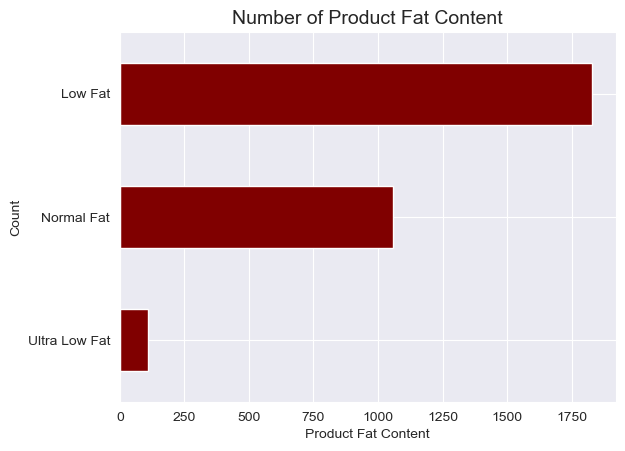

In [132]:
df_clean['Product_Fat_Content'].value_counts()[::-1].plot(kind='barh', color='maroon')

plt.xlabel('Product Fat Content')
plt.ylabel('Count')
plt.title('Number of Product Fat Content', fontsize=14)

Text(0.5, 1.0, 'Number of Products')

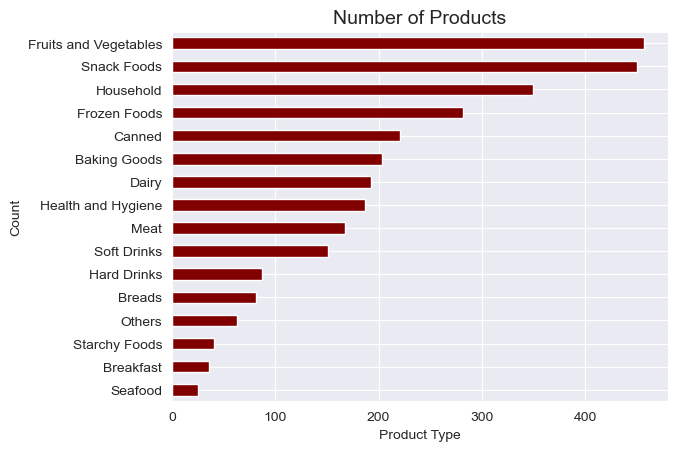

In [152]:
df_clean['Product_Type'].value_counts()[::-1].plot(kind='barh', color='maroon')

plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Number of Products', fontsize=14)

Text(0.5, 1.0, 'Top 10 Product Type')

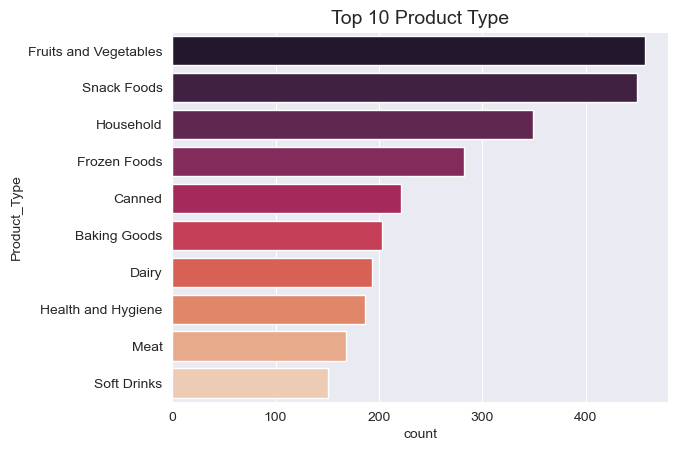

In [153]:
# creating a seaborn countplot
sns.countplot(data=df_clean, y='Product_Type', order=df_clean['Product_Type'].value_counts()[:10].index, palette='rocket');
plt.title('Top 10 Product Type', fontsize=14)

Text(0.5, 1.0, 'Count of Supermarket Size')

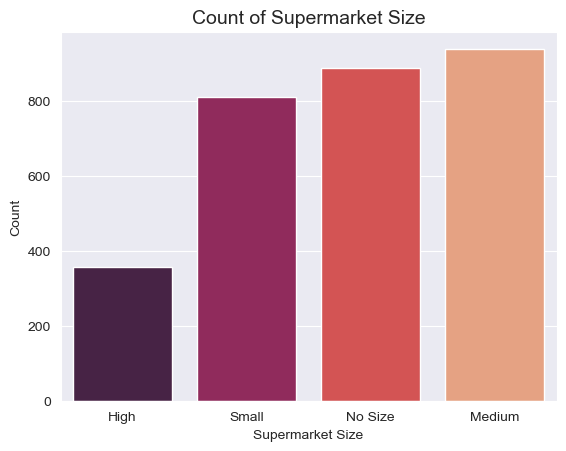

In [60]:
sns.countplot(data=df_clean, x='Supermarket__Size', order=df_clean['Supermarket__Size'].value_counts()[::-1].index, palette='rocket')

plt.xlabel('Supermarket Size')
plt.ylabel('Count')
plt.title('Count of Supermarket Size', fontsize=14)

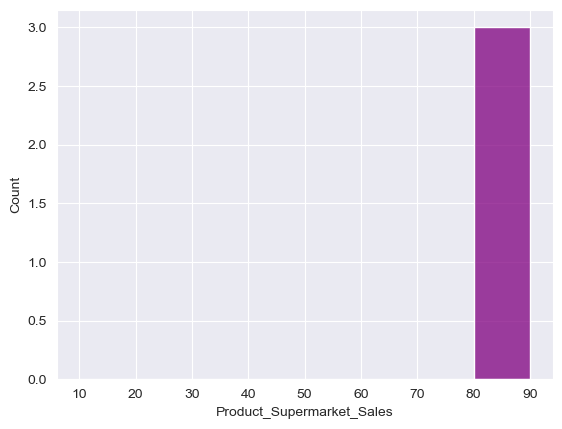

In [61]:
sns.histplot(data=df_clean, x='Product_Supermarket_Sales', bins=np.arange(10, 100, 10), color='purple');



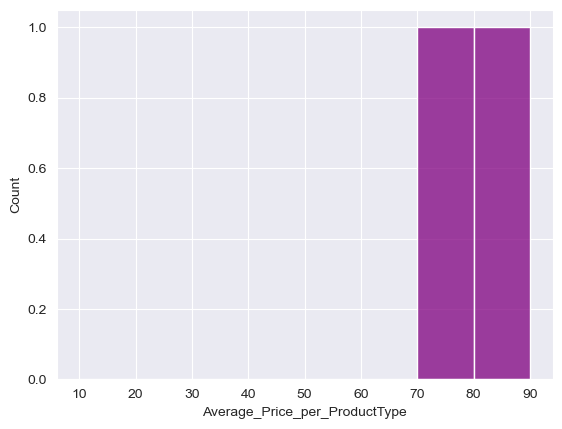

In [62]:
sns.histplot(data=df_clean, x='Average_Price_per_ProductType', bins=np.arange(10, 100, 10), color='purple');


In [154]:
#df_clean.groupby(['Supermarket__Size', 'Product_Type'])['Product_Supermarket_Sales'].count().sort_values(ascending=False)

In [155]:
#df_clean.groupby(['Supermarket__Size', 'Product_Type'])['Product_Supermarket_Sales'].max().sort_values(ascending=False)

In [65]:
# Subsetting the product
#subset_df = df_clean[df_clean['Product_Type'].isin(df_clean['Product_Type'].value_counts().head(5).index)]
#grouped_df = subset_df.groupby('Supermarket__Size')['Product_Type'].value_counts().unstack()

In [156]:
#grouped_df.plot(kind='bar', figsize=[10,5])
#plt.xlabel('Supermarket Size')
#plt.ylabel('Count')
#plt.title('Product distribution in each Supermarket Size')
#plt.show()

In [157]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[10, 5])

#grouped_df.plot(kind='bar', ax=axes[0]);

#sns.histplot(data=df_clean, x='Product_Supermarket_Sales', bins=np.arange(10, 100, 10), color='purple', ax=axes[1]);
